In [45]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')
sys.path.append('Y:\Python\Mega_IT')

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
import seaborn as sb
from concurrent import futures
import datetime as dt
import yfinance as yf
import pyupbit

In [4]:
today = dt.datetime.now()
start = today - dt.timedelta(days=365*3)
start_day = start.strftime("%Y-%m-%d")
start_day

'2021-03-15'

In [8]:
origin1 = yf.download('005930.KS', start=start_day)

origin1.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,82800.0,82900.0,81800.0,81800.0,76796.109375,13735798
2021-03-16,82200.0,83000.0,82100.0,82800.0,77734.937500,12293537
2021-03-17,82800.0,82900.0,82000.0,82300.0,77265.523438,11625146
2021-03-18,82800.0,83800.0,82600.0,82900.0,77828.812500,18585244
2021-03-19,82100.0,82500.0,81800.0,81900.0,76889.984375,15869700


In [9]:
df1 = origin1[['Close']]
df1.head()

,Close
Date,
2021-03-15,81800.0
2021-03-16,82800.0
2021-03-17,82300.0
2021-03-18,82900.0
2021-03-19,81900.0


In [10]:
df1_2 = df1.reset_index()
df1_2.head()

,Date,Close
0,2021-03-15,81800.0
1,2021-03-16,82800.0
2,2021-03-17,82300.0
3,2021-03-18,82900.0
4,2021-03-19,81900.0


In [11]:
df1_3 = df1_2.rename(columns={'Date':'ds', 'Close':'y'})
df1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      740 non-null    datetime64[ns]
 1   y       740 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.7 KB


In [12]:
max_y = df1_3['y'].max()
min_y = df1_3['y'].min()
max_y, min_y

(86000.0, 52600.0)

In [13]:
minmax = df1_3.query("y == @max_y | y == @min_y")
minmax

,ds,y
16,2021-04-06,86000.0
381,2022-09-29,52600.0


In [14]:
min_date = minmax.iloc[0]['ds']
max_date = minmax.iloc[1]['ds']
min_date, max_date

(Timestamp('2021-04-06 00:00:00'), Timestamp('2022-09-29 00:00:00'))

In [15]:
def addon(ax):
    sb.scatterplot(data=minmax, x='ds', y='y', color='red', s=150, marker='o', ax=ax)
    ax.text(min_date, min_y, '[최저점]\n날짜: %s\n종가: %d' % (min_date, min_y), fontsize=12, color='red')
    ax.text(max_date, max_y, '[최고점]\n날짜: %s\n종가: %d' % (max_date, max_y), fontsize=12, color='red')

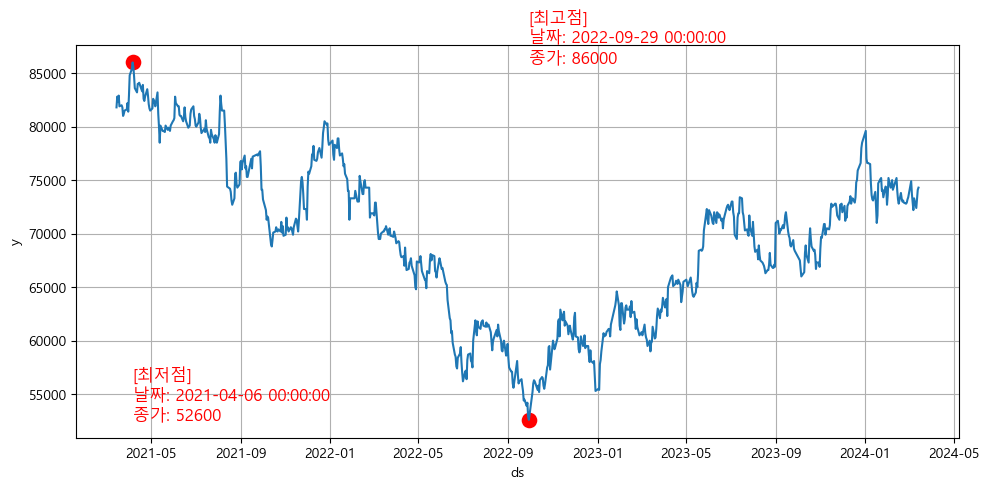

In [16]:
my_lineplot(df1_3, xname='ds', yname='y', dpi=100, callback=addon)

In [17]:
params = {
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'weekly_seasonality': [True, False],
    'daily_seasonality':  [True, False],
    'yearly_seasonality': [True, False],
}

13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] done processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] done processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] done processing
13:42:33 - cmdstanpy - INFO - Chain [1] done processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain [1] start processing
13:42:33 - cmdstanpy - INFO - Chain

+-----+---------------------------+---------------------+--------------------+---------------------------+----------------------+----------------------+---------+
|     |   changepoint_prior_scale | daily_seasonality   | seasonality_mode   |   seasonality_prior_scale | weekly_seasonality   | yearly_seasonality   |   score |
|-----+---------------------------+---------------------+--------------------+---------------------------+----------------------+----------------------+---------|
|   0 |                         1 | False               | multiplicative     |                      0.01 | False                | True                 | 2452.72 |
|   1 |                         1 | True                | multiplicative     |                      0.01 | True                 | True                 | 2452.87 |
|   2 |                         1 | False               | multiplicative     |                      0.01 | True                 | True                 | 2472.19 |
|   3 |               

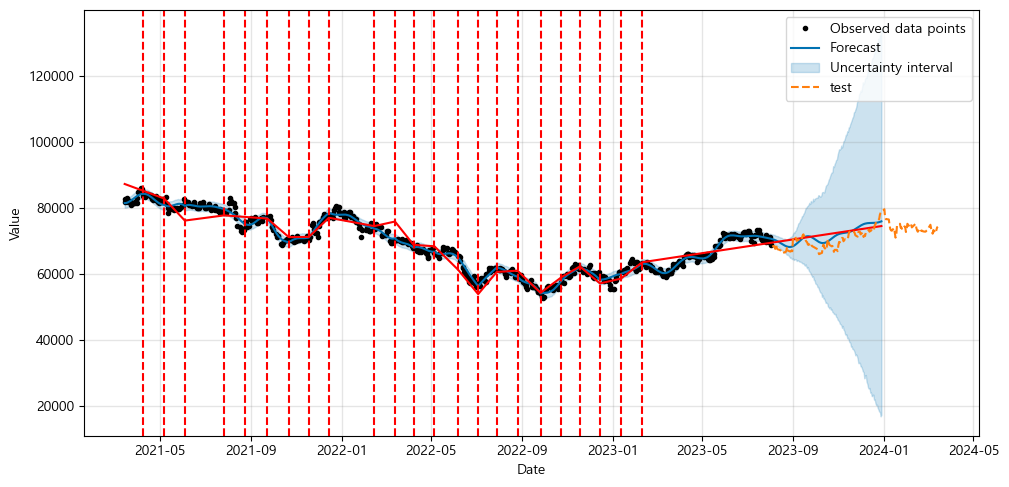

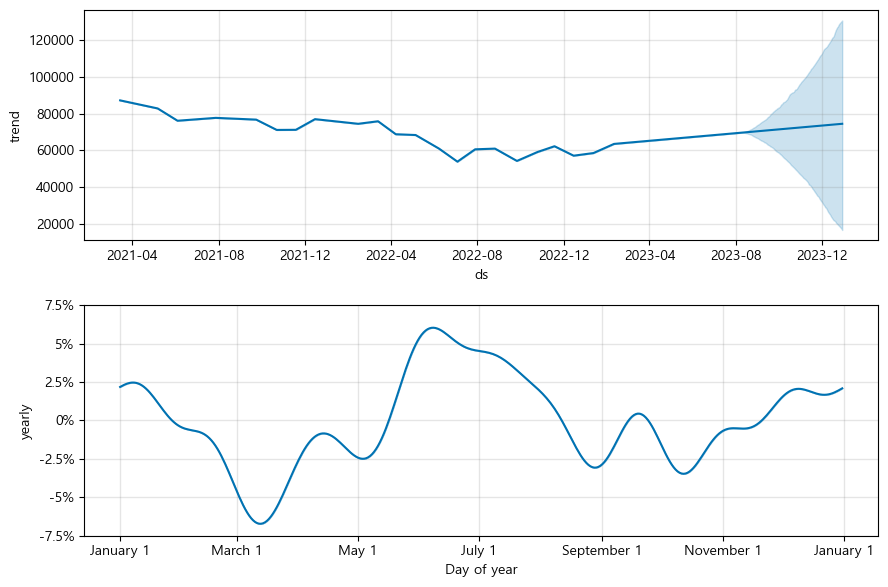

+-----+---------------------+---------+--------------+--------------+---------------+---------------+------------------------+------------------------------+------------------------------+--------------+----------------+----------------+------------------+------------------------+------------------------+---------+
|     | ds                  |   trend |   yhat_lower |   yhat_upper |   trend_lower |   trend_upper |   multiplicative_terms |   multiplicative_terms_lower |   multiplicative_terms_upper |       yearly |   yearly_lower |   yearly_upper |   additive_terms |   additive_terms_lower |   additive_terms_upper |    yhat |
|-----+---------------------+---------+--------------+--------------+---------------+---------------+------------------------+------------------------------+------------------------------+--------------+----------------+----------------+------------------+------------------------+------------------------+---------|
|   0 | 2021-03-15 00:00:00 |   87247 |      8004

In [18]:
train, test = my_timeseries_split(df1_3)

model, param, score, forecast, pred = my_prophet(train, test, freq="D", **params)

In [20]:
dates = pd.date_range(start = origin1.index.min(), end = origin1.index.max(), freq = "1D")
dates

DatetimeIndex(['2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24',
               ...
               '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08',
               '2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12',
               '2024-03-13', '2024-03-14'],
              dtype='datetime64[ns]', length=1096, freq='D')

In [21]:
df2_1 = pd.DataFrame({
    'Close' : 0,
}, index = dates)

df2_1.head()

,Close
2021-03-15,0
2021-03-16,0
2021-03-17,0
2021-03-18,0
2021-03-19,0


In [27]:
df2_1['Close'] = origin1['Close']
df2_1.head(10)

,Close
2021-03-15,81800.0
2021-03-16,82800.0
2021-03-17,82300.0
2021-03-18,82900.0
2021-03-19,81900.0
2021-03-20,NaN
2021-03-21,NaN
2021-03-22,82000.0
2021-03-23,81800.0
2021-03-24,81000.0


In [34]:
df2_tmp = df2_1[df2_1['Close'].isnull()]
df2_tmp['holiday'] = 'holiday'
holiday_df = df2_tmp.drop('Close', axis = 1)
holiday_df.reset_index(inplace = True)
holiday_df.rename(columns = {'index' : 'ds'}, inplace = True)
holiday_df.head()

,ds,holiday
0,2021-03-20,holiday
1,2021-03-21,holiday
2,2021-03-27,holiday
3,2021-03-28,holiday
4,2021-04-03,holiday


In [24]:
df2_2 = df2_1.fillna(method = 'ffill')
df2_2.head(10)

,Close
2021-03-15,81800.0
2021-03-16,82800.0
2021-03-17,82300.0
2021-03-18,82900.0
2021-03-19,81900.0
2021-03-20,81900.0
2021-03-21,81900.0
2021-03-22,82000.0
2021-03-23,81800.0
2021-03-24,81000.0


In [25]:
df2_3 = df2_2.reset_index()
df2_3.head()

,index,Close
0,2021-03-15,81800.0
1,2021-03-16,82800.0
2,2021-03-17,82300.0
3,2021-03-18,82900.0
4,2021-03-19,81900.0


In [40]:
df2_4 = df2_3.rename(columns = {'index' : 'ds', 'Close' : 'y'})

In [35]:
def set_hollydays(m):
    m.add_country_holidays(country_name='KR')

In [43]:
params = {
    'changepoint_prior_scale': [0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 0.5, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'weekly_seasonality': [True, False],
    'daily_seasonality':  [True, False],
    'yearly_seasonality': [True, False],
    'holidays' : [holiday_df]
}

+-----+---------------------------+---------------------+-------------------------+--------------------+---------------------------+----------------------+----------------------+---------+
|     |   changepoint_prior_scale | daily_seasonality   | holidays                | seasonality_mode   |   seasonality_prior_scale | weekly_seasonality   | yearly_seasonality   |   score |
|-----+---------------------------+---------------------+-------------------------+--------------------+---------------------------+----------------------+----------------------+---------|
|   0 |                         1 | True                | ds  holiday             | multiplicative     |                         1 | True                 | True                 | 4575.06 |
|     |                           |                     | 0   2021-03-20  holiday |                    |                           |                      |                      |         |
|     |                           |                    

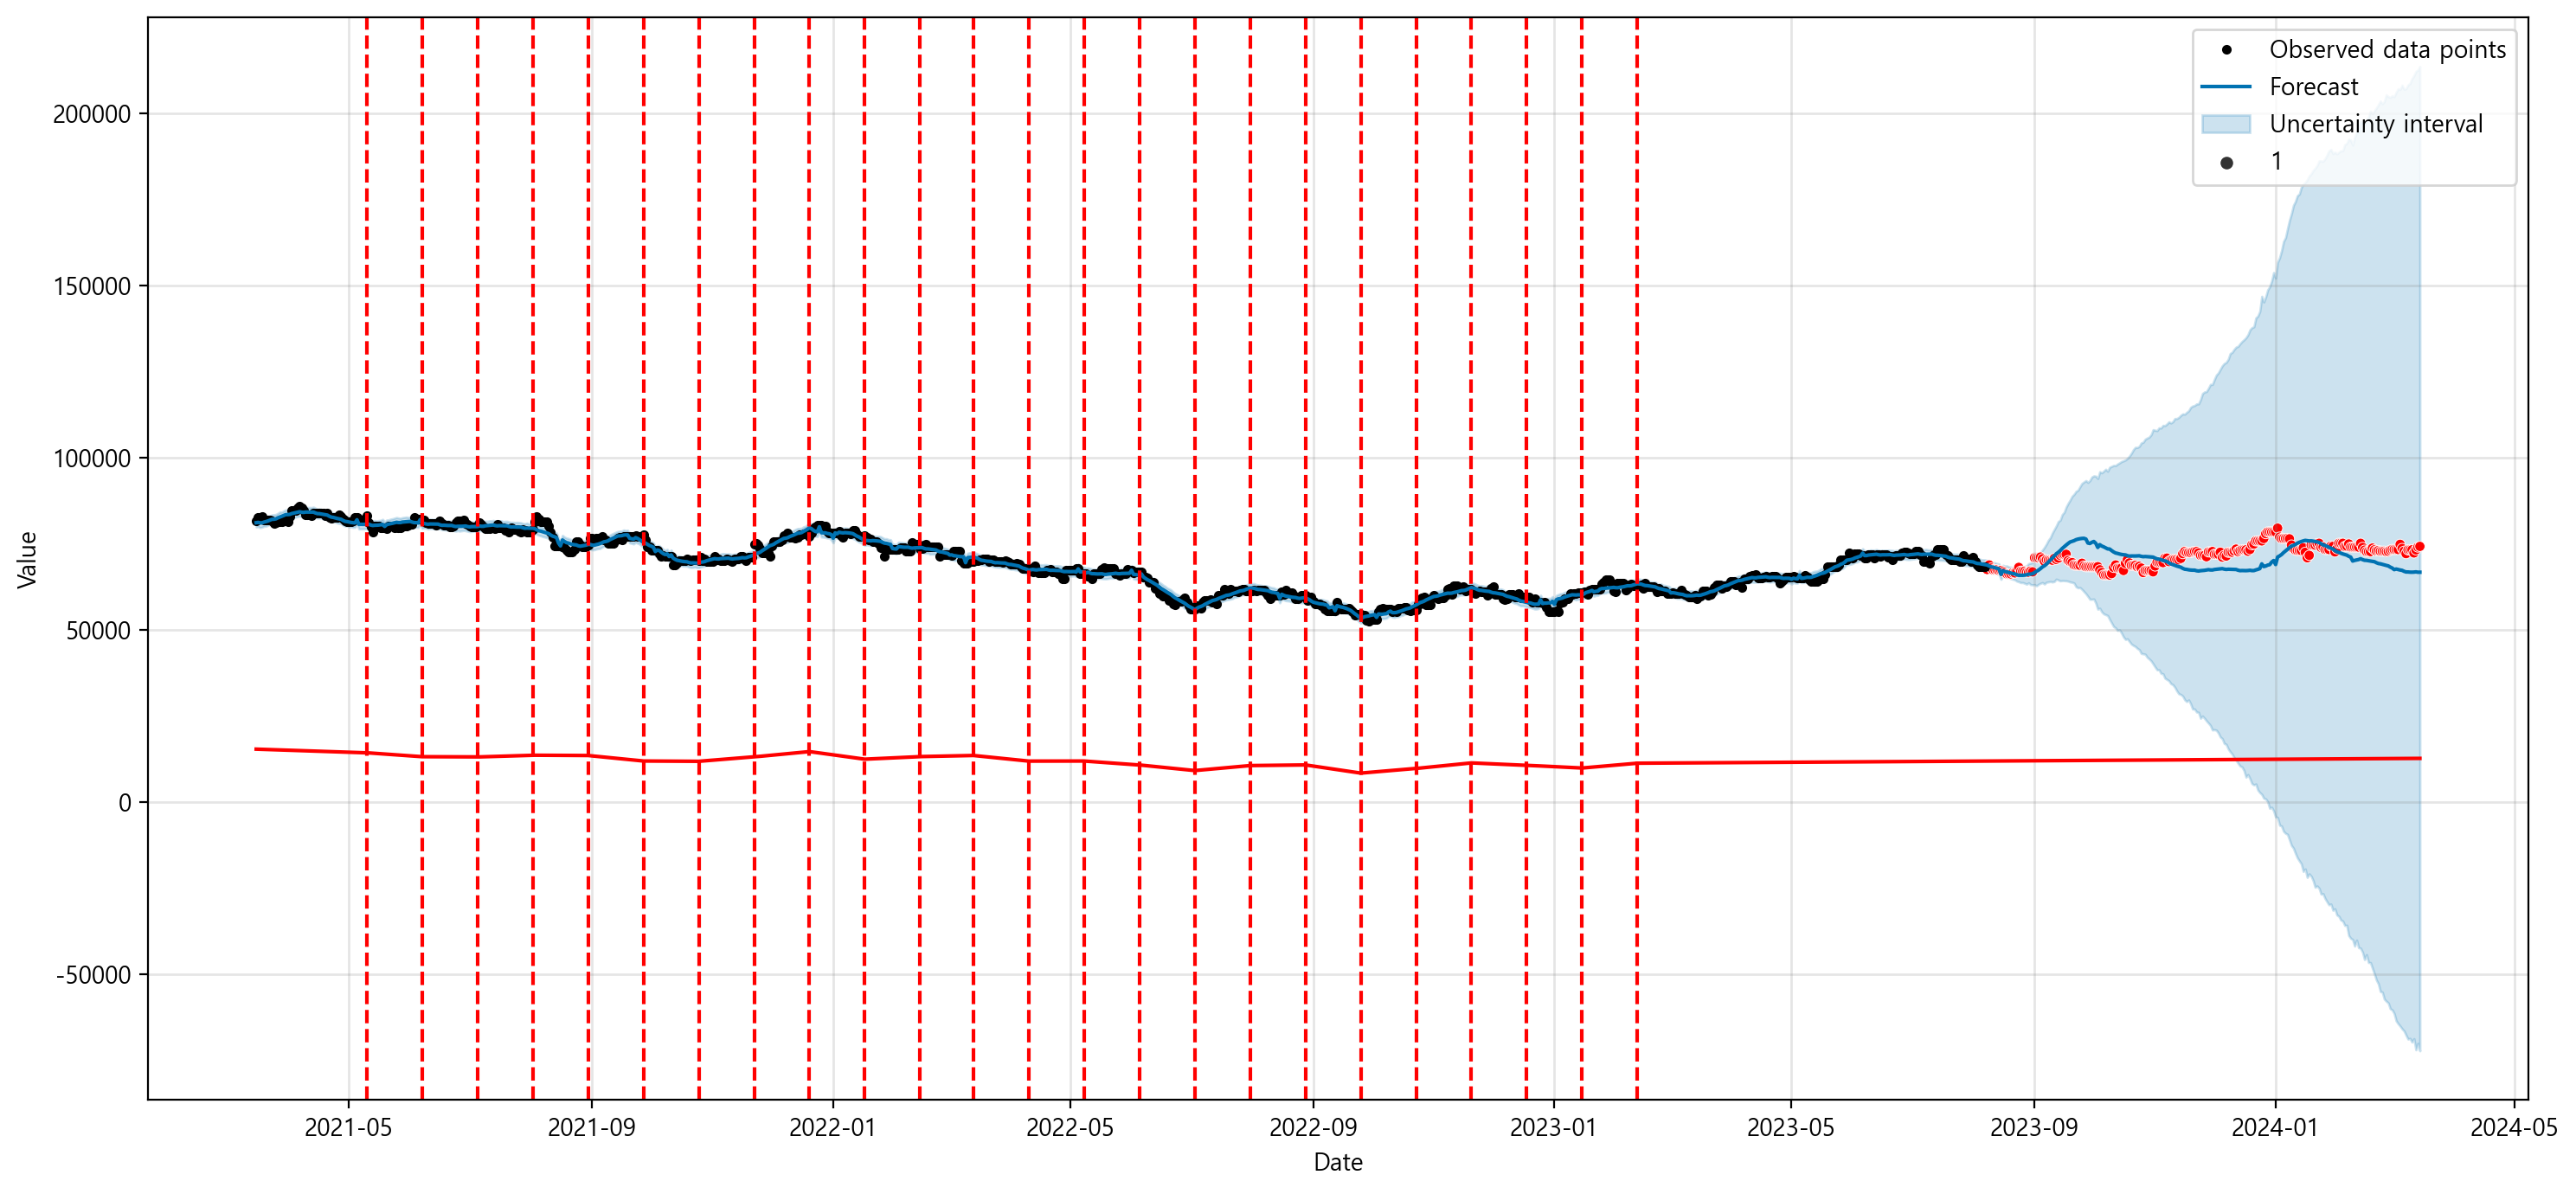

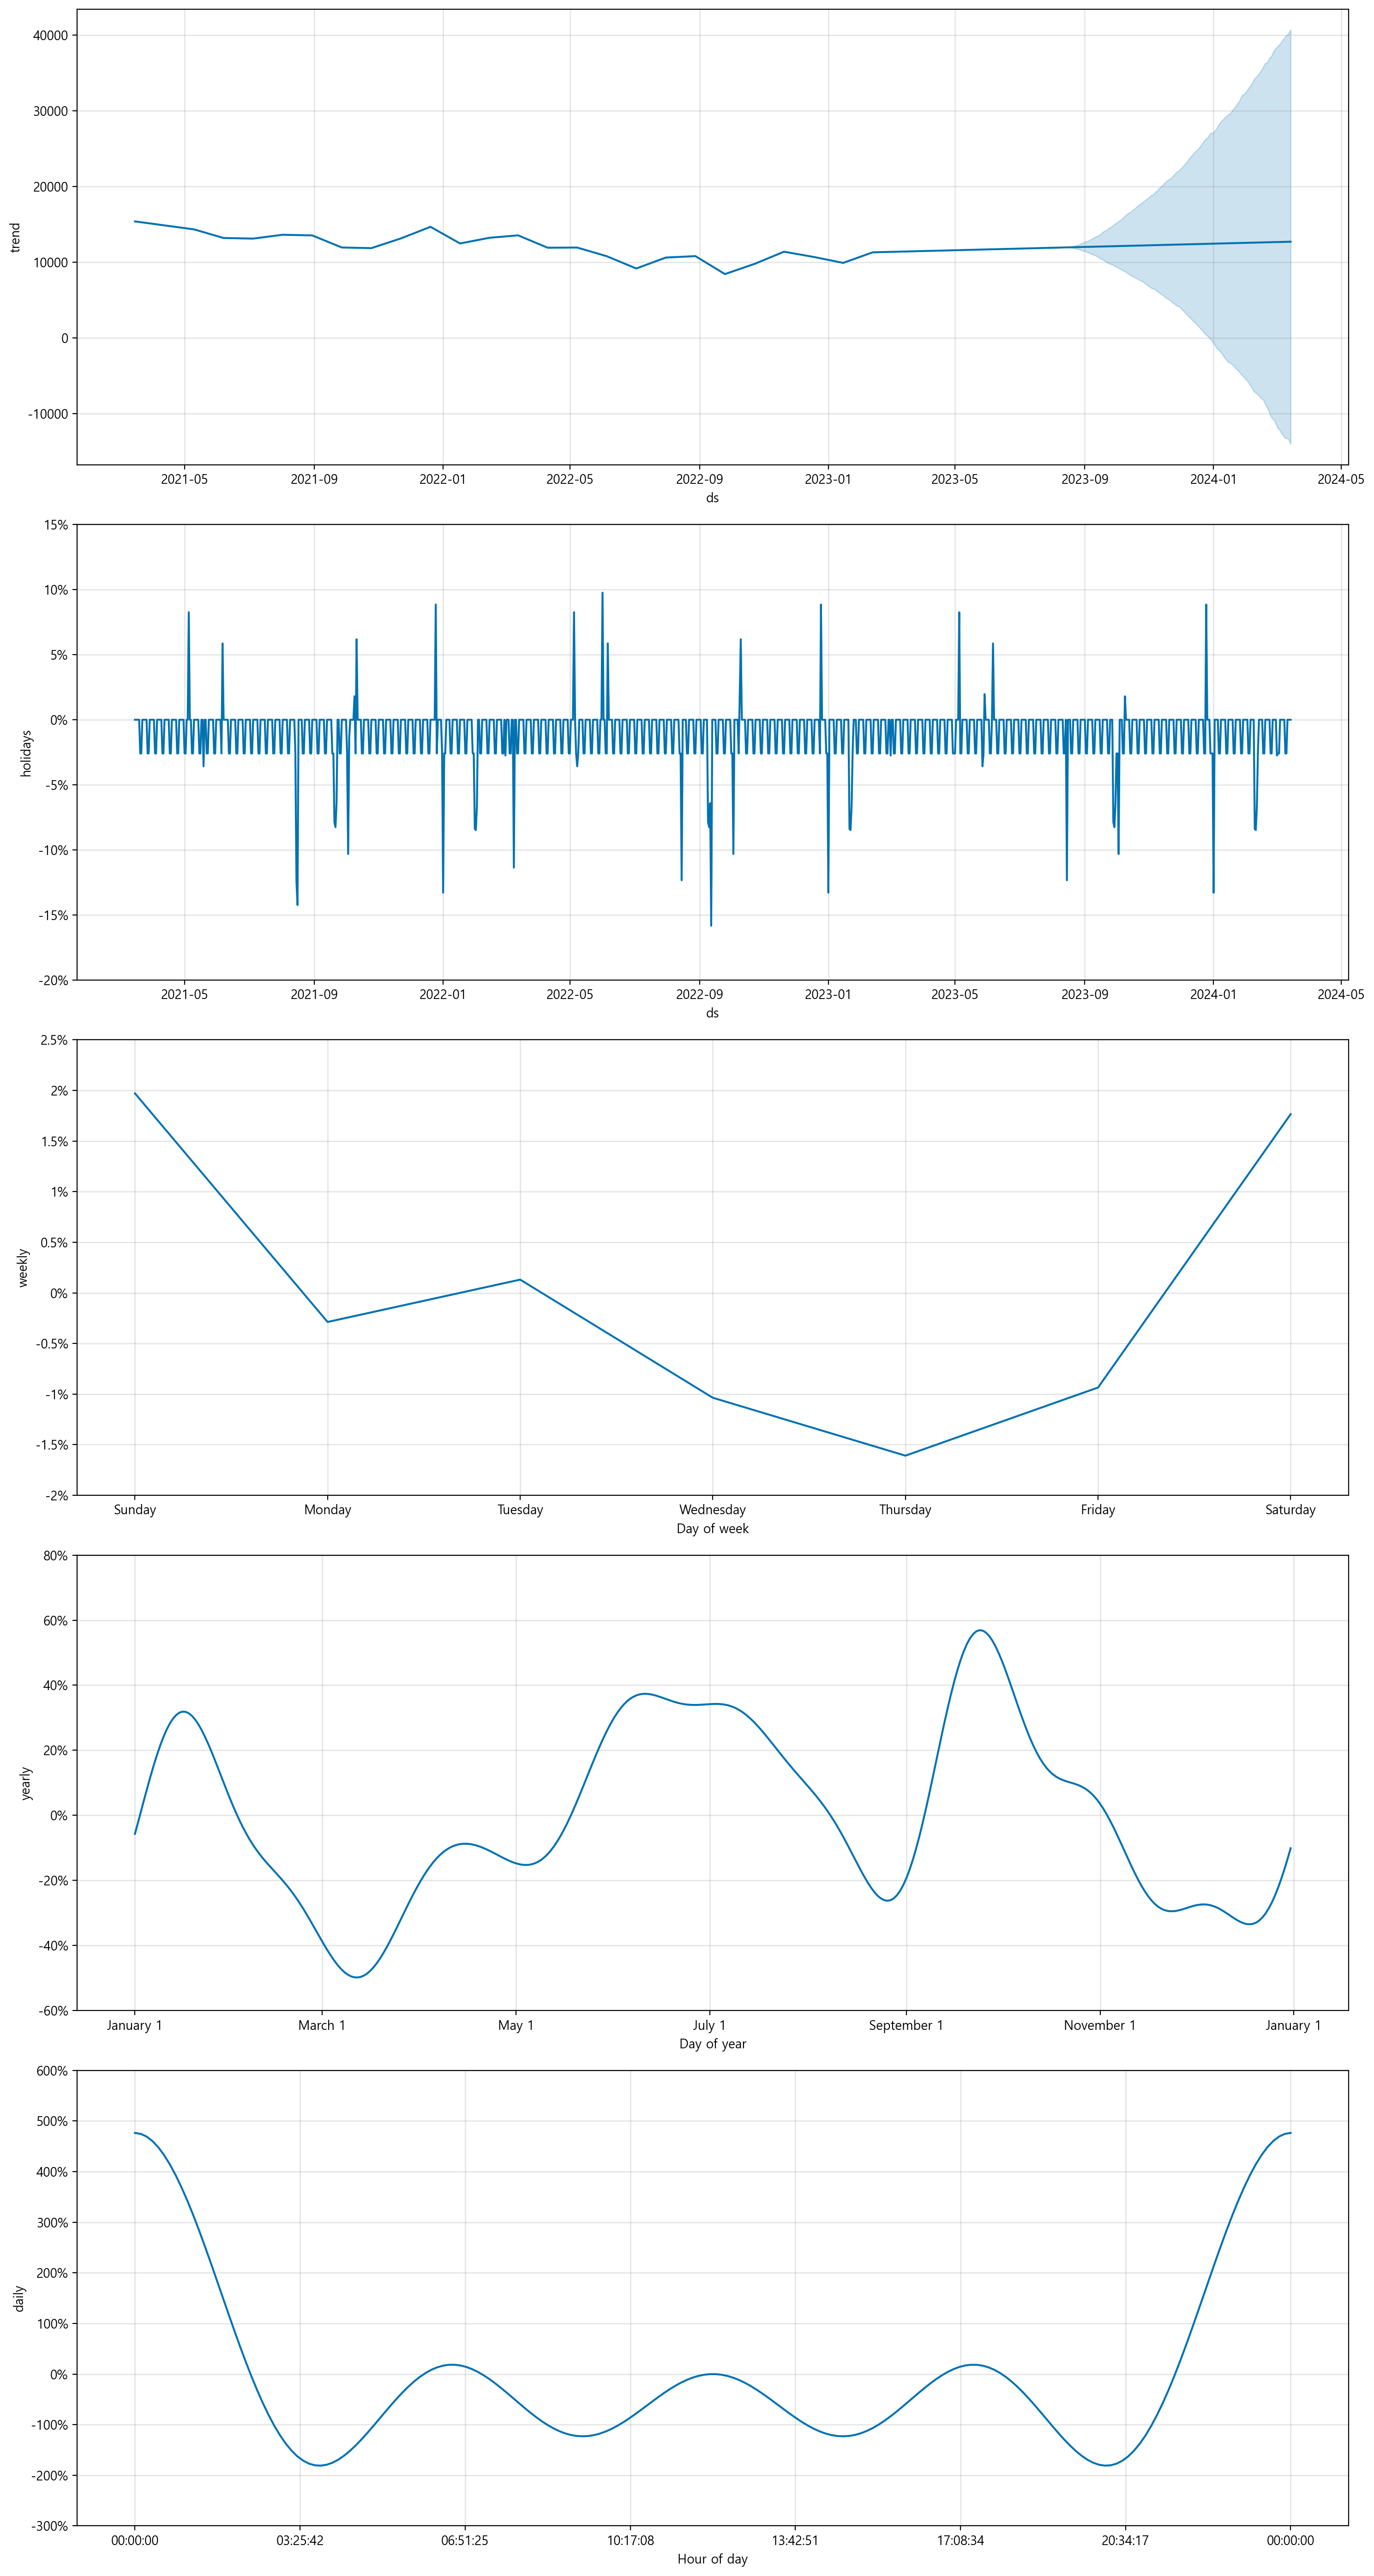

+-------------------+-------------+
|                   |     Prophet |
|-------------------+-------------|
| 평균절대오차(MAE) |     3845.64 |
| 평균제곱오차(MSE) | 2.09312e+07 |
| 평균오차(RMSE)    |     4575.06 |
+-------------------+-------------+


In [44]:
train, test = my_timeseries_split(df2_4)

model, param, score, forecast, pred = my_prophet(train, test, freq="D", figsize=(15, 7), dpi=200, callback=set_hollydays, **params)

In [47]:
print(pyupbit.get_tickers(fiat = 'KRW'))

['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-XRP', 'KRW-ETC', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLYX', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-HIFI', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PDA', 'KRW-DOT', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 'KRW-META', 'KRW-FCT2', 'KRW-CBK', 'KRW-SAND', 'KRW-HPO', 'KRW-D

In [49]:
ticker = 'KRW-BTC'
to = dt.datetime.now().strftime('%Y-%m-%d')
count = 500
interval = 'day'
origin2 = pyupbit.get_ohlcv(ticker = ticker, interval = interval, to = to, count = count)
origin2.head(20)

,open,high,low,close,volume,value
2022-10-31 09:00:00,28957000.0,29217000.0,28580000.0,28778000.0,3780.017757,1.091265e+11
2022-11-01 09:00:00,28778000.0,28928000.0,28634000.0,28749000.0,2933.716643,8.443021e+10
2022-11-02 09:00:00,28753000.0,29299000.0,28500000.0,28632000.0,7547.861369,2.176693e+11
2022-11-03 09:00:00,28632000.0,28900000.0,28443000.0,28693000.0,6757.692914,1.940869e+11
2022-11-04 09:00:00,28685000.0,29679000.0,28683000.0,29388000.0,7964.117852,2.317181e+11
2022-11-05 09:00:00,29388000.0,29870000.0,29304000.0,29756000.0,5550.079702,1.649672e+11
2022-11-06 09:00:00,29756000.0,29869000.0,29400000.0,29473000.0,3135.465388,9.305541e+10
2022-11-07 09:00:00,29470000.0,29658000.0,28790000.0,28945000.0,5212.344719,1.521590e+11
2022-11-08 09:00:00,28945000.0,29020000.0,25842000.0,26650000.0,21680.492361,5.947722e+11
2022-11-09 09:00:00,26652000.0,26832000.0,22564000.0,22919000.0,22296.852651,5.527159e+11


In [50]:
origin2['price'] = (origin2['high'] + origin2['low']) / 2

In [51]:
origin2.head()

,open,high,low,close,volume,value,price
2022-10-31 09:00:00,28957000.0,29217000.0,28580000.0,28778000.0,3780.017757,1.091265e+11,28898500.0
2022-11-01 09:00:00,28778000.0,28928000.0,28634000.0,28749000.0,2933.716643,8.443021e+10,28781000.0
2022-11-02 09:00:00,28753000.0,29299000.0,28500000.0,28632000.0,7547.861369,2.176693e+11,28899500.0
2022-11-03 09:00:00,28632000.0,28900000.0,28443000.0,28693000.0,6757.692914,1.940869e+11,28671500.0
2022-11-04 09:00:00,28685000.0,29679000.0,28683000.0,29388000.0,7964.117852,2.317181e+11,29181000.0


In [56]:
df3_1 = origin2[['price']]
df3_1.reset_index(inplace = True)
df3_1.rename(columns = {'index' : 'ds', 'price' : 'y'}, inplace = True)
df3_1.head()

,ds,y
0,2022-10-31 09:00:00,28898500.0
1,2022-11-01 09:00:00,28781000.0
2,2022-11-02 09:00:00,28899500.0
3,2022-11-03 09:00:00,28671500.0
4,2022-11-04 09:00:00,29181000.0


In [62]:
tmp_df = df3_1.copy()
tmp_df['days'] = tmp_df['ds'].apply(lambda x : dt.date.weekday(x))
tmp_df.head()

,ds,y,days
0,2022-10-31 09:00:00,28898500.0,0
1,2022-11-01 09:00:00,28781000.0,1
2,2022-11-02 09:00:00,28899500.0,2
3,2022-11-03 09:00:00,28671500.0,3
4,2022-11-04 09:00:00,29181000.0,4


In [70]:
holidays = tmp_df[tmp_df['days'] >= 5]['ds'].reset_index(drop = True)
holidays = pd.DataFrame(holidays)
holidays['holiday'] = 'holiday'
holidays

,ds,holiday
0,2022-11-05 09:00:00,holiday
1,2022-11-06 09:00:00,holiday
2,2022-11-12 09:00:00,holiday
3,2022-11-13 09:00:00,holiday
4,2022-11-19 09:00:00,holiday
...,...,...
137,2024-02-25 09:00:00,holiday
138,2024-03-02 09:00:00,holiday
139,2024-03-03 09:00:00,holiday
140,2024-03-09 09:00:00,holiday


In [71]:
params = {
    'changepoint_prior_scale': [0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 0.5, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'weekly_seasonality': [True, False],
    'daily_seasonality':  [True, False],
    'yearly_seasonality': [True, False],
    'holidays' : [holidays]
}

+-----+---------------------------+---------------------+----------------------------------+--------------------+---------------------------+----------------------+----------------------+-------------+
|     |   changepoint_prior_scale | daily_seasonality   | holidays                         | seasonality_mode   |   seasonality_prior_scale | weekly_seasonality   | yearly_seasonality   |       score |
|-----+---------------------------+---------------------+----------------------------------+--------------------+---------------------------+----------------------+----------------------+-------------|
|   0 |                         1 | True                | ds  holiday                      | multiplicative     |                         1 | True                 | False                | 8.34599e+06 |
|     |                           |                     | 0   2022-11-05 09:00:00  holiday |                    |                           |                      |                      |     

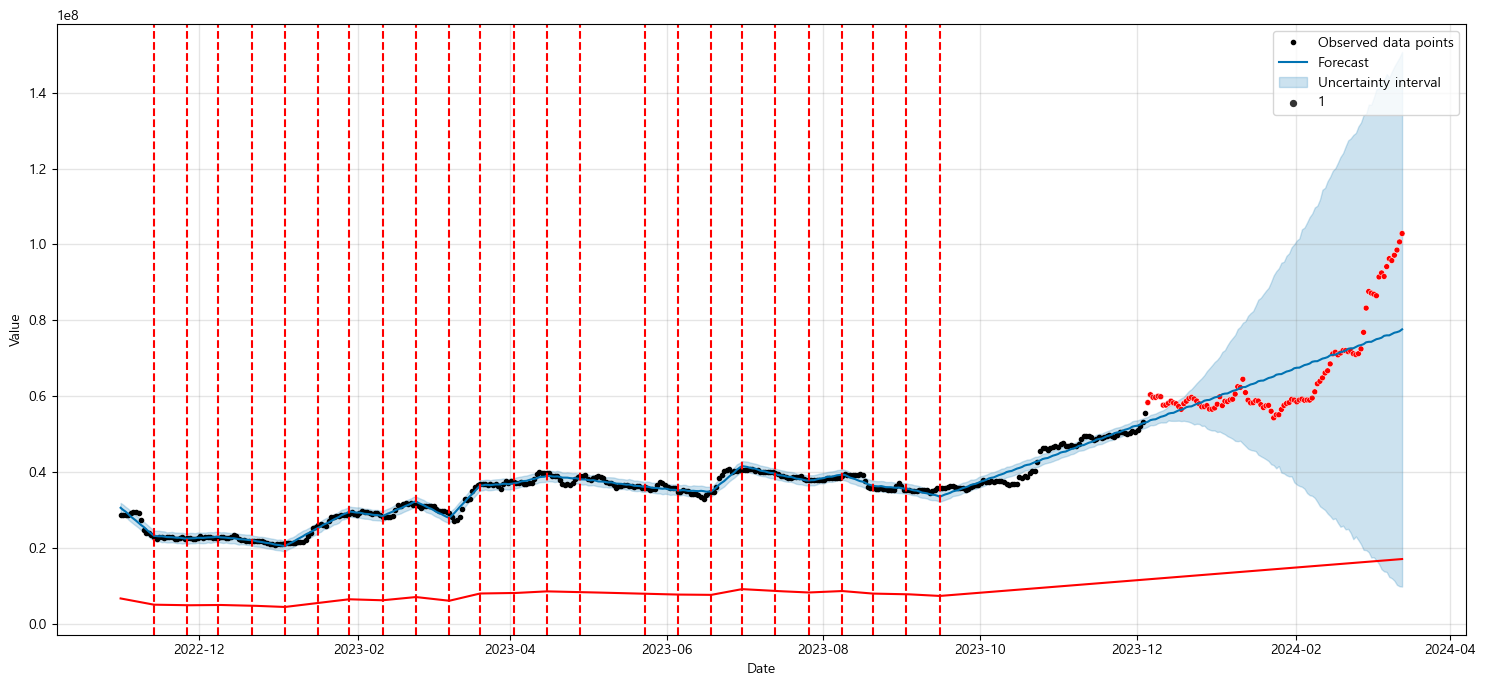

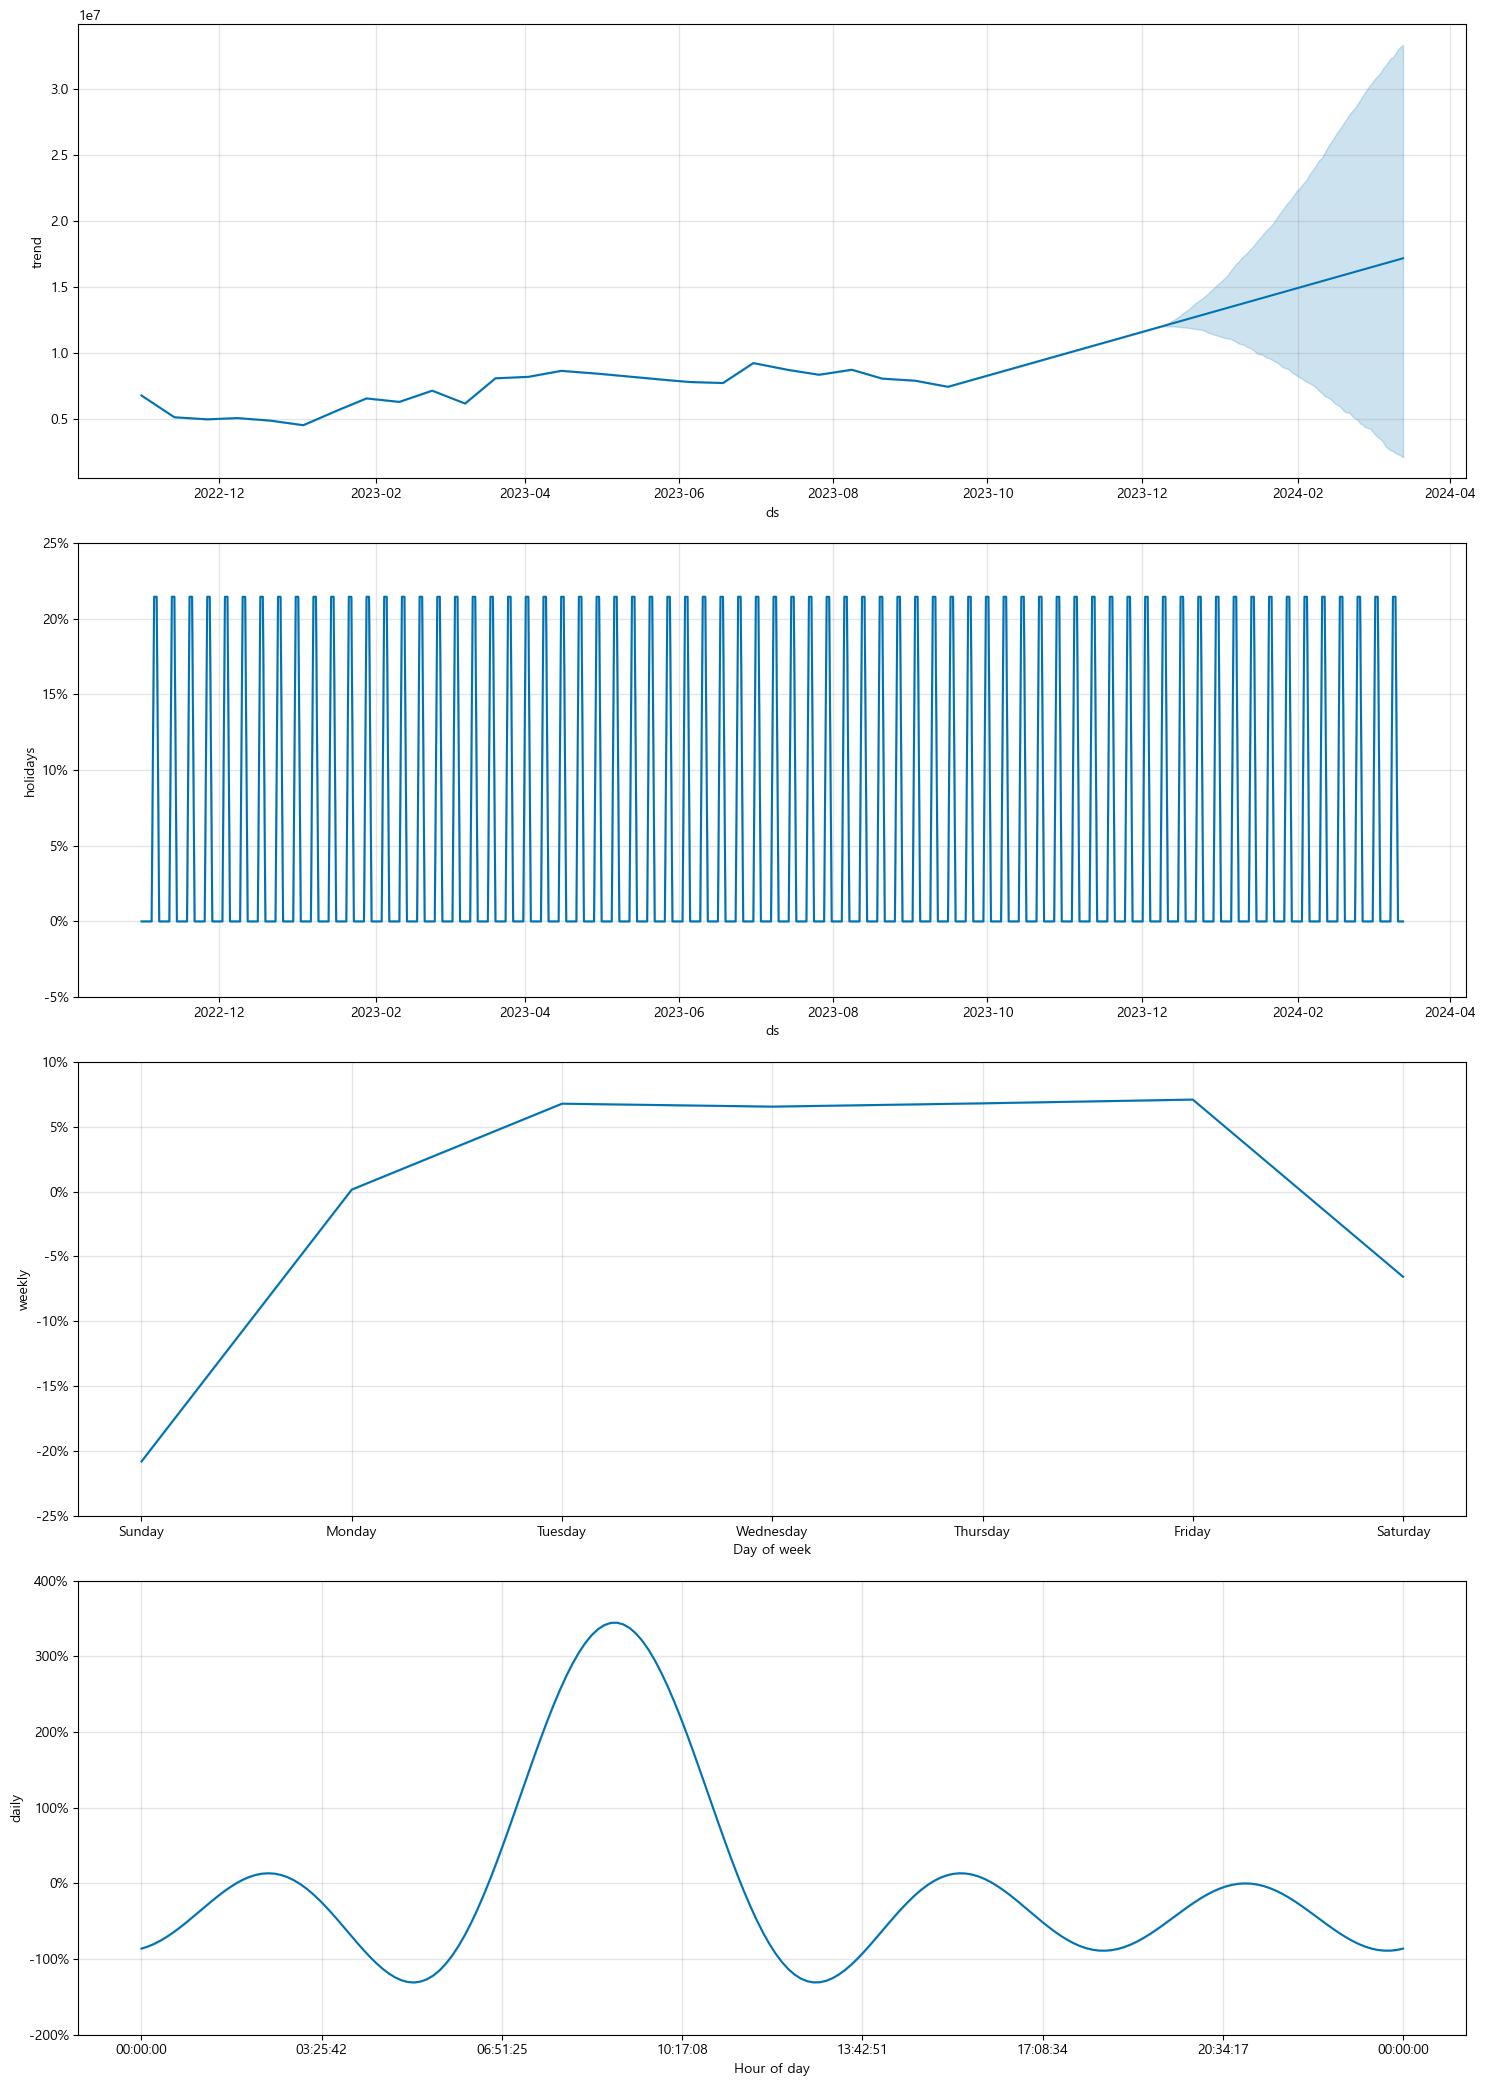

+-------------------+-------------+
|                   |     Prophet |
|-------------------+-------------|
| 평균절대오차(MAE) | 6.03224e+06 |
| 평균제곱오차(MSE) | 6.96555e+13 |
| 평균오차(RMSE)    | 8.34599e+06 |
+-------------------+-------------+


In [72]:
train, test = my_timeseries_split(df3_1)

model, param, score, forecast, pred = my_prophet(train, test, freq="D", figsize=(15, 7), dpi=100, **params)

In [77]:
forecast[['trend', 'trend_upper', 'trend_lower']]

,trend,trend_upper,trend_lower
0,6.809619e+06,6.809619e+06,6.809619e+06
1,6.683113e+06,6.683113e+06,6.683113e+06
2,6.556608e+06,6.556608e+06,6.556608e+06
3,6.430102e+06,6.430102e+06,6.430102e+06
4,6.303596e+06,6.303596e+06,6.303596e+06
...,...,...,...
495,1.696668e+07,3.238849e+07,2.623090e+06
496,1.702065e+07,3.264941e+07,2.458509e+06
497,1.707463e+07,3.298808e+07,2.369014e+06
498,1.712860e+07,3.317751e+07,2.279889e+06


In [78]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,holiday,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-10-31 09:00:00,6.809619e+06,2.931819e+07,3.196345e+07,6.809619e+06,6.809619e+06,3.446732,3.446732,3.446732,0.000000,...,3.505156,3.505156,3.505156,0.058424,0.058424,0.058424,0.0,0.0,0.0,3.067840e+07
1,2022-11-01 09:00:00,6.683113e+06,2.869218e+07,3.150175e+07,6.683113e+06,6.683113e+06,3.446732,3.446732,3.446732,0.000000,...,3.504956,3.504956,3.504956,0.058224,0.058224,0.058224,0.0,0.0,0.0,3.010713e+07
2,2022-11-02 09:00:00,6.556608e+06,2.836469e+07,3.091611e+07,6.556608e+06,6.556608e+06,3.446732,3.446732,3.446732,0.000000,...,3.519617,3.519617,3.519617,0.072884,0.072884,0.072884,0.0,0.0,0.0,2.963335e+07
3,2022-11-03 09:00:00,6.430102e+06,2.758494e+07,3.041811e+07,6.430102e+06,6.430102e+06,3.446732,3.446732,3.446732,0.000000,...,3.512505,3.512505,3.512505,0.065773,0.065773,0.065773,0.0,0.0,0.0,2.901587e+07
4,2022-11-04 09:00:00,6.303596e+06,2.698021e+07,2.971284e+07,6.303596e+06,6.303596e+06,3.446732,3.446732,3.446732,0.000000,...,3.498122,3.498122,3.498122,0.051390,0.051390,0.051390,0.0,0.0,0.0,2.835435e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-03-09 09:00:00,1.696668e+07,1.212651e+07,1.455109e+08,2.623090e+06,3.238849e+07,3.446732,3.446732,3.446732,0.214476,...,3.505077,3.505077,3.505077,-0.156131,-0.156131,-0.156131,0.0,0.0,0.0,7.643620e+07
496,2024-03-10 09:00:00,1.702065e+07,1.148097e+07,1.468907e+08,2.458509e+06,3.264941e+07,3.446732,3.446732,3.446732,0.214476,...,3.510644,3.510644,3.510644,-0.150564,-0.150564,-0.150564,0.0,0.0,0.0,7.677410e+07
497,2024-03-11 09:00:00,1.707463e+07,1.038381e+07,1.480619e+08,2.369014e+06,3.298808e+07,3.446732,3.446732,3.446732,0.000000,...,3.505156,3.505156,3.505156,0.058424,0.058424,0.058424,0.0,0.0,0.0,7.692387e+07
498,2024-03-12 09:00:00,1.712860e+07,1.001800e+07,1.492414e+08,2.279889e+06,3.317751e+07,3.446732,3.446732,3.446732,0.000000,...,3.504956,3.504956,3.504956,0.058224,0.058224,0.058224,0.0,0.0,0.0,7.716360e+07
